# 関数補間：Rungeの現象


区間 $[-1,1]$ を $n$等分する点たちを標本点とするLagrange補間を考える．<br>
このとき，補間関数に予想外の振動が生じる．これをRungeの現象と呼ぶ．

In [2]:
# 標本点 a[] に対する f のLagrange補間 p_n(x) を返却する
function lagrange(f, a, x)
    n = length(a)
    L(i,x) = prod((j != i) ? (x-a[j])/(a[i]-a[j]) : 1 for j in 1:n)   
    return sum(f(a[i])*L(i,x) for i in 1:n) 
end

lagrange (generic function with 1 method)

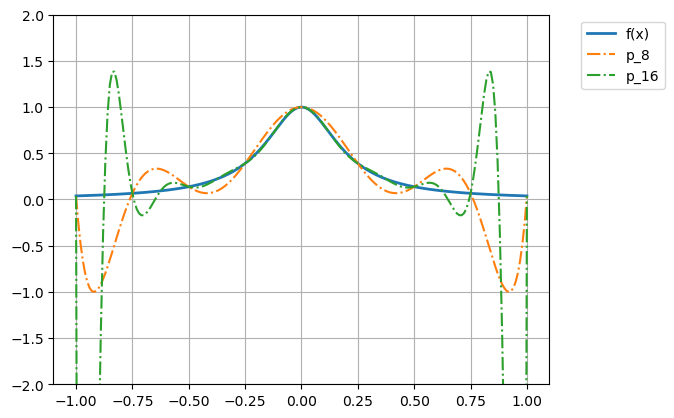

PyObject <matplotlib.legend.Legend object at 0x14fd631c0>

In [3]:
using PyPlot
f(x) = 1/(1+25x^2)   # 補間する関数
a,b = -1, 1   # 区間

t = a:0.01:b  
plot(t, f.(t), lw = 2, label="f(x)")  # f(x)
M = 8; q = a:(b-a)/M:b
plot(t, [lagrange(f, q, x) for x in t], linestyle = :dashdot, label="p_8") 
M = 16; q = a:(b-a)/M:b
plot(t, [lagrange(f, q, x) for x in t], linestyle = :dashdot, label="p_16") 

ylim([-2,2])  #描画範囲を y ∈ [-2,2]に設定
grid()   # グリッド線表示
legend(bbox_to_anchor=(1.05, 1), loc="upper left")    # 凡例

# 【参考】基底関数の描画
Lagrange補間の基底関数をJuliaで描画する．
区間$[-1,1]$を16等分割した場合を考える．

Lagrange補間の基底関数$L_1(x), L_2(x), \ldots, L_{17}(x)$をJuliaで描画するコードは以下のとおりである．

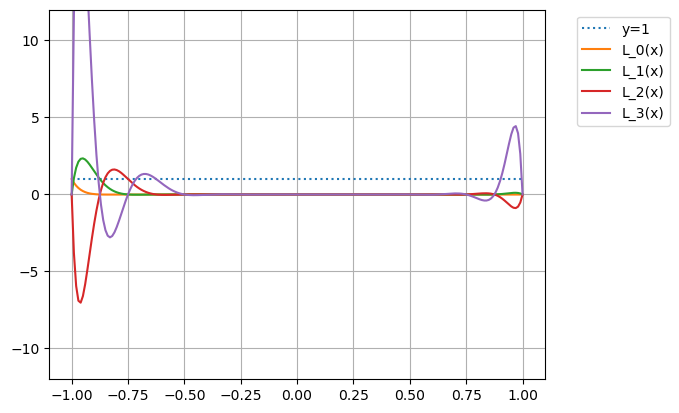

PyObject <matplotlib.legend.Legend object at 0x16a894eb0>

In [4]:
# 基底関数の描画
n = 16
a = collect(-1:2/n:1)  
# 第i番目の標本点似対応する基底関数
L(i,x) = prod((j != i) ? (x-a[j])/(a[i]-a[j]) : 1 for j in 1:n+1)   
t = -1:0.01:1  

# グラフの描画
plot(t, [1 for x in t], ls=":", label="y=1")
for i in 0:3
    plot(t, [L(i+1,x) for x in t], label="L_$i(x)") # 番号が1つずれる
end

ylim([-12,12])    # y軸方向の描画範囲を設定
grid()  # グリッド表示ON
legend(bbox_to_anchor=(1.05, 1), loc="upper left")    # 凡例

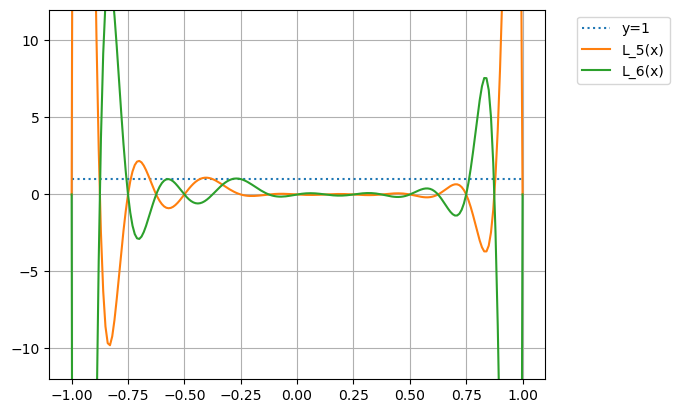

PyObject <matplotlib.legend.Legend object at 0x16b27aa00>

In [5]:
plot(t, [1 for x in t], ls=":", label="y=1")

for i in 5:6
    plot(t, [L(i+1,x) for x in t], label="L_$i(x)") # 番号が1つずれる
end

ylim([-12,12])    # y軸方向の描画範囲を設定
grid()  # グリッド表示ON
legend(bbox_to_anchor=(1.05, 1), loc="upper left")    # 凡例

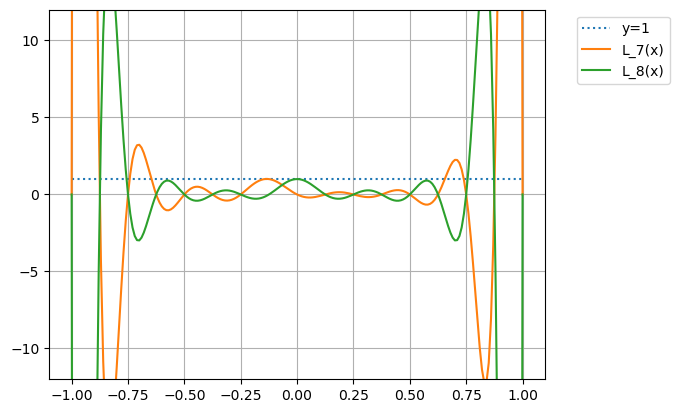

PyObject <matplotlib.legend.Legend object at 0x16b500e80>

In [6]:
plot(t, [1 for x in t], ls=":", label="y=1")

for i in 7:8
    plot(t, [L(i+1,x) for x in t], label="L_$i(x)") # 番号が1つずれる
end

ylim([-12,12])    # y軸方向の描画範囲を設定
grid()  # グリッド表示ON
legend(bbox_to_anchor=(1.05, 1), loc="upper left")    # 凡例

両端に近い標本点に対応する基底関数（$L_1，L_2$）は比較的おとなしい関数形をしているが，

中心に近い基底関数（$L_7, L_8$）に関しては両端に近づくにつれて非常に大きな振動が観察される．

このようなことは実際に描画してみないと気付きにくい．